Run locally or <a target="_blank" href="https://colab.research.google.com/github/aalgahmi/dl_handouts/blob/main/01.introduction_to%20tensors.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Introduction to Tensors

This notebook provides a concise tutorial on using tensors in PyTorch. It serves as a starting point and is not intended to be exhaustive. It's important to note that we are building upon our existing knowledge of NumPy, Pandas, and Sci-kit Learn rather than replacing them.

PyTorch and its ecosystem are constructed around NumPy and its tensors, with many functions operating similarly to NumPy's nd-arrays and their functions. However, PyTorch tensors offer three significant improvements:

* They can utilize GPUs and TPUs for enhanced performance.
* They enable automatic computation of gradients for arbitrary differentiable tensor operations.
* They support computation distribution across various devices and clusters.

To begin, we import the torch library.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## What is a tensor?

A **tensor** is basically a multidimensional array. It generalizes scalars, vectors, and matrices. A tensor is defined by three key attributes:
* **Rank**: The number of axes or dimensions. You can find the rank of a tensor using the attribute `ndim`
* **Shape**: A tuple of integers describing how many units along each dimension. You can find the shape of a tensor using the attribute `shape`
* **Data type**: The type of the data contained in the tensor. You can find the data type of a tensor using the attribute `dtype`

Given this definition, both NumPy arrays and PyTorch tensors are considered tensors. Let's see a couple of examples:

**Scalars**: Scalar values are considered 0-dimensional tensors. Here is a few examples:

In [2]:
s = np.array(3)
s, s.ndim, s.shape, s.dtype

(array(3), 0, (), dtype('int64'))

In [3]:
s1 = torch.tensor(3)
s1, s1.ndim, s1.shape, s1.dtype

(tensor(3), 0, torch.Size([]), torch.int64)

As you can see, the scalar value `3` is an integer with `0` dimensions and `()` shape (or empty size in PyTorch). This tensor has one element.

**IMPORTANT**: You can always convert a 0-dimensional tensor back to a scalar value using the `item()` method.

In [4]:
s1.item()

3

**Vectors**: A vector is simply a one-dimensional tensor like this. For example:

In [5]:
v = np.array([2, 4, 0, 1])
v, v.ndim, v.shape, v.dtype

(array([2, 4, 0, 1]), 1, (4,), dtype('int64'))

In [6]:
v1 = torch.tensor([2, 4, 0, 1])
v1, v1.ndim, v1.shape, v1.dtype

(tensor([2, 4, 0, 1]), 1, torch.Size([4]), torch.int64)

**Matrices**: A matrix is a two-dimensional array. Here is an example `4 by 3` (12 elements) matrix:

In [7]:
m = np.array([[2, 4, 1], [1, 3, 3], [0, 5, 1], [1, 0, 2]])
m, m.ndim, m.shape, m.dtype

(array([[2, 4, 1],
        [1, 3, 3],
        [0, 5, 1],
        [1, 0, 2]]),
 2,
 (4, 3),
 dtype('int64'))

In [8]:
m1 = torch.tensor([[2, 4, 1], [1, 3, 3], [0, 5, 1], [1, 0, 2]])
m1, m1.ndim, m1.shape, m1.dtype

(tensor([[2, 4, 1],
         [1, 3, 3],
         [0, 5, 1],
         [1, 0, 2]]),
 2,
 torch.Size([4, 3]),
 torch.int64)

## Creating tensors
In addition to the previously mentioned examples of creating tensors from Python values and lists, PyTorch provides alternative methods for tensor creation:

### From NumPy Arrays
There are two ways to create PyTorch tensors from NumPy arrays, depending on whether the underlying memory location is shared or not. Here is an example of creating a tensor that is a copy of a NumPy array without a shared memory location. Given the array:

In [9]:
n = np.array([[2, 4, 0], [1, 3, 5], [6, 7, 8]])
n

array([[2, 4, 0],
       [1, 3, 5],
       [6, 7, 8]])

Here is a tensor copy of it:

In [10]:
n1 = torch.tensor(n)
n1

tensor([[2, 4, 0],
        [1, 3, 5],
        [6, 7, 8]])

The array and tensor, here, don't share memory. That means that changing an element in the array does not affect the tensor and vice verso. If, for example, let's replace the middle `3` element for the array with `99`:


The array and tensor, in this case, do not share memory. This implies that altering an element in the array does not impact the tensor, and vice versa. For instance, if we replace the middle `3` element in the array with `99`:

In [11]:
n[1,1] = 99

Here are the array and the tensor after this change:

In [12]:
n, n1

(array([[ 2,  4,  0],
        [ 1, 99,  5],
        [ 6,  7,  8]]),
 tensor([[2, 4, 0],
         [1, 3, 5],
         [6, 7, 8]]))

As you can see, the tensor remains unaffected by the change, indicating distinct memory locations for each.

While this approach may be suitable for small arrays, it can be inefficient and wasteful for larger ones. To address this, we can utilize the `torch.from_numpy()` function to create a tensor that shares the same memory location with its array.

In [13]:
n2 = torch.from_numpy(n)
n2

tensor([[ 2,  4,  0],
        [ 1, 99,  5],
        [ 6,  7,  8]])

Let's replace `99` of the tensor with `11`

In [14]:
n2[1,1] = 11

Here are the array and the tensor after this change:

In [15]:
n, n2

(array([[ 2,  4,  0],
        [ 1, 11,  5],
        [ 6,  7,  8]]),
 tensor([[ 2,  4,  0],
         [ 1, 11,  5],
         [ 6,  7,  8]]))

As you can see, the changed affected both, because they share the same memory location.

**NOTICE THAT** you can convert a tensor to a NumPy array using the `numpy()` method:

In [16]:
n2.numpy()

array([[ 2,  4,  0],
       [ 1, 11,  5],
       [ 6,  7,  8]])

### Using ranges
Tensors could also be created from ranges. For example, we can create a tensor with values from the range of 1 (inclusive) and 100 (exclusive).

In [17]:
r = torch.arange(1, 100)
r, r.ndim, r.shape, r.dtype

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
         37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
         55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
         73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
         91, 92, 93, 94, 95, 96, 97, 98, 99]),
 1,
 torch.Size([99]),
 torch.int64)

Here is another range with values between -4 and 4 (exclusive) and with a step (delta) of .5.

In [18]:
r = torch.arange(-4, 4, step=.5)
r,r.ndim, r.shape, r.dtype

(tensor([-4.0000, -3.5000, -3.0000, -2.5000, -2.0000, -1.5000, -1.0000, -0.5000,
          0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000]),
 1,
 torch.Size([16]),
 torch.float32)

PyTorch also supports `tf.linspace`, which allows us to create as many data points between and including two values as we want. The following takes the range between -4 and 4 (both inclusive) and returns 17 equally spaced data points.

In [19]:
r = torch.linspace(-4, 4, 17)
r,r.ndim, r.shape, r.dtype

(tensor([-4.0000, -3.5000, -3.0000, -2.5000, -2.0000, -1.5000, -1.0000, -0.5000,
          0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,
          4.0000]),
 1,
 torch.Size([17]),
 torch.float32)

### Using Random numbers
First, use the following statement to seed PyTorch's random generator. This is important for reproducing results.

In [20]:
torch.manual_seed(17)

Keep in mind that the above statement impacts numbers generated by PyTorch's random generator and not by other libraries such as NumPy. These other libraries will have to be seeded separately.

Next, we can use `torch.rand()` to generate random numbers from a uniform distribution on the interval $[0, 1)$. Here is a tensor with 4 by 5 random numbers in the period $[0, 1)$:

In [21]:
torch.rand(4,5)

tensor([[4.3424e-01, 5.3511e-01, 8.3021e-01, 1.2386e-01, 2.9321e-02],
        [5.4940e-01, 3.8249e-01, 5.4626e-01, 4.6828e-01, 1.7153e-02],
        [2.1382e-02, 3.6643e-01, 2.0535e-01, 1.9226e-01, 3.5434e-01],
        [2.1795e-01, 1.0574e-04, 1.4056e-01, 6.0028e-01, 5.6578e-01]])

And here is a 5 by 5 tensor filled with random numbers from a normal distribution with mean 0 and variance 1.

In [22]:
torch.randn(5,5)

tensor([[ 0.3518,  0.1863,  0.9567,  0.0895,  0.0068],
        [-1.7377,  1.2938, -0.1662,  0.2750, -0.3202],
        [ 1.3715, -0.7086,  0.2190,  0.7703,  0.9553],
        [ 1.0025,  1.0673,  2.0900,  1.6963, -0.0480],
        [-0.4849,  1.0632, -1.6568,  2.4467, -0.9278]])

Here is also a 4 by 6 by 2 tensor filled with random numbers from a normal distribution with a mean of 5 and a standard deviation of 2.

In [23]:
torch.normal(5.0, 2.0, size=(4, 6, 2))

tensor([[[ 5.4685,  3.6918],
         [ 4.1712,  4.9850],
         [ 5.7924,  4.6141],
         [ 6.1105,  7.1149],
         [ 6.2435,  1.4751],
         [ 4.0317,  7.0404]],

        [[ 5.2979,  5.7136],
         [ 5.9124,  3.8198],
         [ 2.8643,  5.0731],
         [ 5.1640,  5.9199],
         [ 5.4560,  3.7492],
         [ 1.8370,  4.6630]],

        [[ 7.1037,  3.2333],
         [ 4.6204,  5.0386],
         [ 0.8389,  6.5989],
         [ 4.3689, 10.0968],
         [ 5.3245,  3.3861],
         [ 7.1125,  8.9963]],

        [[ 5.4417,  7.2514],
         [ 5.5446,  4.6553],
         [ 7.5182,  5.3694],
         [ 5.2308,  3.2965],
         [ 3.7619,  4.0510],
         [ 2.2091,  6.6606]]])

Finally, here is a 4 by 3 tensor filled with random integers generated uniformly between two values: a low 11 (inclusive) and a high 46 (exclusive).

In [24]:
torch.randint(11, 46, size=(4, 3))

tensor([[30, 17, 27],
        [39, 24, 43],
        [38, 27, 12],
        [15, 32, 24]])

### Other ways to create tensors

We don't have to values to create tensors; they can be uninitialized. Here is a 3 by 3 uninitialized tensor:

In [25]:
torch.empty(3, 3)

tensor([[4.7851e+22, 2.8826e+32, 4.4248e+30],
        [7.2442e+22, 2.3086e-12, 7.2646e+22],
        [7.2250e+28, 1.5766e-19, 6.3376e-10]])

The values you see in this tensor reflect whatever garbage is in its memory location.

Next, we create a 3D (rank-3) tensor filled with ones:

In [26]:
t = torch.ones(3, 2, 1)
t, t.ndim, t.shape, t.dtype

(tensor([[[1.],
          [1.]],
 
         [[1.],
          [1.]],
 
         [[1.],
          [1.]]]),
 3,
 torch.Size([3, 2, 1]),
 torch.float32)

And similarly, here is a tensor filled with zeros:

In [27]:
t = torch.zeros(2, 4)
t, t.ndim, t.shape, t.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 2,
 torch.Size([2, 4]),
 torch.float32)

We can use the `torch.full` function to create a tensor with a given shape (say `2 by 3`) and populate it with a certain value (say `9.7`):

In [28]:
t = torch.full((2,3), 9.7)
t, t.ndim, t.shape, t.dtype

(tensor([[9.7000, 9.7000, 9.7000],
         [9.7000, 9.7000, 9.7000]]),
 2,
 torch.Size([2, 3]),
 torch.float32)

We can also create identify matrices:

In [29]:
t = torch.eye(4)
t, t.ndim, t.shape, t.dtype

(tensor([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]),
 2,
 torch.Size([4, 4]),
 torch.float32)

## Changing tensors

Tensors have certain attributes that we change. Here are few of them:

### Changing the `dtype` of a tensor
Both PyTorch and NumPy have different default data types. It's important and highly recommended when you create tensors from NumPy data to always specify explicitly the data type you want the tensors to have. Given the array:

In [30]:
r = np.linspace(-4, 4, 17)
r,r.ndim, r.shape, r.dtype

(array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
         1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 1,
 (17,),
 dtype('float64'))

We can convert this array to a tensor with a different data type in multiple ways::

In [31]:
rt = torch.tensor(r, dtype=torch.float)
rt, rt.dtype

(tensor([-4.0000, -3.5000, -3.0000, -2.5000, -2.0000, -1.5000, -1.0000, -0.5000,
          0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,
          4.0000]),
 torch.float32)

or:

In [32]:
rt = torch.from_numpy(r).float()
rt, rt.dtype

(tensor([-4.0000, -3.5000, -3.0000, -2.5000, -2.0000, -1.5000, -1.0000, -0.5000,
          0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,
          4.0000]),
 torch.float32)

And any tensor can be changed to a different data type using the `to()` method.

In [33]:
rt2 = rt.to(torch.double)
rt2, rt2.dtype

(tensor([-4.0000, -3.5000, -3.0000, -2.5000, -2.0000, -1.5000, -1.0000, -0.5000,
          0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,
          4.0000], dtype=torch.float64),
 torch.float64)

Check [this documentation page](https://pytorch.org/docs/stable/tensor_attributes.html#torch.dtype) for a list of supported data types.

### Changing the device of a tensor.

All the tensors we have created so far were created in the CPU. We can check that like this:

In [34]:
rt.device

device(type='cpu')

We can check if our system supports accelerated hardware such as `cuda` or `mps` (on MacOS)like this

In [35]:
torch.cuda.is_available()

False

Or:

In [36]:
torch.backends.mps.is_available()

False

We can create a tensor on a specific GPU like this:

In [37]:
if torch.cuda.is_available():
    x = torch.ones((5, 5), device='cuda')
elif torch.backends.mps.is_available():
    x = torch.ones((5, 5), device='mps')
else:
    x = torch.ones((5, 5), device='cpu')

x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

A better approach is to have something like this:

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Then, every time you want to create a tensor on a supported GPU, you right something like this:

In [39]:
y = torch.tensor([7, 6, 9], dtype=torch.float32, device=device)
y

tensor([7., 6., 9.])

**NOTICE THAT** we can re-create an existing tensor of one device in another using the `to()` method. For example, the tensor:

In [40]:
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

can be re-created in the CPU like this:

In [41]:
x.to(device='cpu')

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [42]:
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### Reshaping and transposing a tensor
We can reshape a tensor using the `reshape()` method:

In [43]:
x = torch.rand(32)
x

tensor([0.7009, 0.3105, 0.2115, 0.5456, 0.7595, 0.3313, 0.0695, 0.2692, 0.1510,
        0.0182, 0.1681, 0.6722, 0.0483, 0.6568, 0.5558, 0.2432, 0.7911, 0.5242,
        0.6310, 0.0962, 0.3618, 0.5136, 0.6393, 0.4931, 0.7278, 0.2047, 0.2617,
        0.1803, 0.4954, 0.9245, 0.7630, 0.7823])

In [44]:
x = x.reshape(2, 16)
x, x.shape

(tensor([[0.7009, 0.3105, 0.2115, 0.5456, 0.7595, 0.3313, 0.0695, 0.2692, 0.1510,
          0.0182, 0.1681, 0.6722, 0.0483, 0.6568, 0.5558, 0.2432],
         [0.7911, 0.5242, 0.6310, 0.0962, 0.3618, 0.5136, 0.6393, 0.4931, 0.7278,
          0.2047, 0.2617, 0.1803, 0.4954, 0.9245, 0.7630, 0.7823]]),
 torch.Size([2, 16]))

In [45]:
x = x.reshape(4, 8)
x, x.shape

(tensor([[0.7009, 0.3105, 0.2115, 0.5456, 0.7595, 0.3313, 0.0695, 0.2692],
         [0.1510, 0.0182, 0.1681, 0.6722, 0.0483, 0.6568, 0.5558, 0.2432],
         [0.7911, 0.5242, 0.6310, 0.0962, 0.3618, 0.5136, 0.6393, 0.4931],
         [0.7278, 0.2047, 0.2617, 0.1803, 0.4954, 0.9245, 0.7630, 0.7823]]),
 torch.Size([4, 8]))

You can transpose the above matrix like this:

In [46]:
x.T

tensor([[0.7009, 0.1510, 0.7911, 0.7278],
        [0.3105, 0.0182, 0.5242, 0.2047],
        [0.2115, 0.1681, 0.6310, 0.2617],
        [0.5456, 0.6722, 0.0962, 0.1803],
        [0.7595, 0.0483, 0.3618, 0.4954],
        [0.3313, 0.6568, 0.5136, 0.9245],
        [0.0695, 0.5558, 0.6393, 0.7630],
        [0.2692, 0.2432, 0.4931, 0.7823]])

More generally, use `torch.transpose` to transpose a tensor of any dimensionality. For example, the following transposes the matrix above by swapping dimensions 0 and 1.

In [47]:
torch.transpose(t, 0, 1)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

## Working with tensors
### Indexing and slicing
Indexing and slicing tensors is similar to indexing NumPy arrays. It's also similar to the basic rules of NumPy indexing. Indexes start at `0`, negative indexes count backwards from the end; and colons `:` are used for slices using the format: `start:stop:step`. Given the tensor:

In [48]:
v_2d = torch.clone(x).reshape(8, 4)
v_2d

tensor([[0.7009, 0.3105, 0.2115, 0.5456],
        [0.7595, 0.3313, 0.0695, 0.2692],
        [0.1510, 0.0182, 0.1681, 0.6722],
        [0.0483, 0.6568, 0.5558, 0.2432],
        [0.7911, 0.5242, 0.6310, 0.0962],
        [0.3618, 0.5136, 0.6393, 0.4931],
        [0.7278, 0.2047, 0.2617, 0.1803],
        [0.4954, 0.9245, 0.7630, 0.7823]])

Here is the element at the top left corner:

In [49]:
v_2d[0,0]

tensor(0.7009)

Here is the last column:

In [50]:
v_2d[:,-1]

tensor([0.5456, 0.2692, 0.6722, 0.2432, 0.0962, 0.4931, 0.1803, 0.7823])

and the last row:

In [51]:
v_2d[-1,:]

tensor([0.4954, 0.9245, 0.7630, 0.7823])

And finally here are every other row starting at the top:

In [52]:
v_2d[0:8:2,:]

tensor([[0.7009, 0.3105, 0.2115, 0.5456],
        [0.1510, 0.0182, 0.1681, 0.6722],
        [0.7911, 0.5242, 0.6310, 0.0962],
        [0.7278, 0.2047, 0.2617, 0.1803]])

### Splitting  and concatenating tensors
We can use the `torch.split` to split a tensor into multiple parts.

In [53]:
p1, p2 = torch.split(x, split_size_or_sections=2)
p1, p2

(tensor([[0.7009, 0.3105, 0.2115, 0.5456, 0.7595, 0.3313, 0.0695, 0.2692],
         [0.1510, 0.0182, 0.1681, 0.6722, 0.0483, 0.6568, 0.5558, 0.2432]]),
 tensor([[0.7911, 0.5242, 0.6310, 0.0962, 0.3618, 0.5136, 0.6393, 0.4931],
         [0.7278, 0.2047, 0.2617, 0.1803, 0.4954, 0.9245, 0.7630, 0.7823]]))

And if you have multiple tensors that you want to put together, we can use `torch.concat` or `torch.concatenate` or `torch.cat` along a given axis.

In [54]:
torch.concat((p1, p2), axis=0)

tensor([[0.7009, 0.3105, 0.2115, 0.5456, 0.7595, 0.3313, 0.0695, 0.2692],
        [0.1510, 0.0182, 0.1681, 0.6722, 0.0483, 0.6568, 0.5558, 0.2432],
        [0.7911, 0.5242, 0.6310, 0.0962, 0.3618, 0.5136, 0.6393, 0.4931],
        [0.7278, 0.2047, 0.2617, 0.1803, 0.4954, 0.9245, 0.7630, 0.7823]])

or

In [55]:
torch.concat((p1, p2), axis=1)

tensor([[0.7009, 0.3105, 0.2115, 0.5456, 0.7595, 0.3313, 0.0695, 0.2692, 0.7911,
         0.5242, 0.6310, 0.0962, 0.3618, 0.5136, 0.6393, 0.4931],
        [0.1510, 0.0182, 0.1681, 0.6722, 0.0483, 0.6568, 0.5558, 0.2432, 0.7278,
         0.2047, 0.2617, 0.1803, 0.4954, 0.9245, 0.7630, 0.7823]])

But if we want to arrange or stack tenors along a new dimension, then we use `torch.stack`. For example, given the following three one-deminsional tensors:

In [56]:
x = torch.tensor([1,3,5])
y = torch.tensor([10,30,50])
z = torch.tensor([100,300,500])

x.shape, y.shape, z.shape

(torch.Size([3]), torch.Size([3]), torch.Size([3]))

We can stack these tensors to make a two-dimensional matrix:

In [57]:
torch.stack([x, y, z])

tensor([[  1,   3,   5],
        [ 10,  30,  50],
        [100, 300, 500]])

or

In [58]:
torch.stack([x, y, z], axis=1)

tensor([[  1,  10, 100],
        [  3,  30, 300],
        [  5,  50, 500]])

## Mathematical functions

### Basic operations
We can apply simple mathematical operations to tensors. We can also apply linear algebra operations such as the dot product or the matrix multiplication. Let's start by creating two tensors both on the same device.

In [59]:
t1 = torch.normal(10, 3, size=(4, 3))
t2 = torch.full((4, 3), 9.7)

t1, t2

(tensor([[14.3706,  3.5976,  9.5152],
         [10.0047,  7.3342, 11.6616],
         [12.3461,  8.6009, 10.1178],
         [ 7.1976, 10.6908,  7.6625]]),
 tensor([[9.7000, 9.7000, 9.7000],
         [9.7000, 9.7000, 9.7000],
         [9.7000, 9.7000, 9.7000],
         [9.7000, 9.7000, 9.7000]]))

Here are a few familiar operations:

In [60]:
2 * t1

tensor([[28.7412,  7.1952, 19.0305],
        [20.0093, 14.6683, 23.3232],
        [24.6922, 17.2018, 20.2355],
        [14.3952, 21.3815, 15.3249]])

In [61]:
t1 + t2

tensor([[24.0706, 13.2976, 19.2152],
        [19.7047, 17.0342, 21.3616],
        [22.0461, 18.3009, 19.8178],
        [16.8976, 20.3908, 17.3625]])

In [62]:
t1 - t2

tensor([[ 4.6706, -6.1024, -0.1848],
        [ 0.3047, -2.3658,  1.9616],
        [ 2.6461, -1.0991,  0.4178],
        [-2.5024,  0.9908, -2.0375]])

In [63]:
t1 * t2

tensor([[139.3947,  34.8967,  92.2979],
        [ 97.0453,  71.1413, 113.1173],
        [119.7574,  83.4287,  98.1424],
        [ 69.8166, 103.7004,  74.3259]])

In [64]:
t2 / t1

tensor([[0.6750, 2.6962, 1.0194],
        [0.9695, 1.3226, 0.8318],
        [0.7857, 1.1278, 0.9587],
        [1.3477, 0.9073, 1.2659]])

In [65]:
t1 // t2

tensor([[1., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [0., 1., 0.]])

The above operations could also be done like this:

In [66]:
torch.multiply(2, t1)

tensor([[28.7412,  7.1952, 19.0305],
        [20.0093, 14.6683, 23.3232],
        [24.6922, 17.2018, 20.2355],
        [14.3952, 21.3815, 15.3249]])

In [67]:
torch.add(t1, t2)

tensor([[24.0706, 13.2976, 19.2152],
        [19.7047, 17.0342, 21.3616],
        [22.0461, 18.3009, 19.8178],
        [16.8976, 20.3908, 17.3625]])

In [68]:
torch.subtract(t1, t2)

tensor([[ 4.6706, -6.1024, -0.1848],
        [ 0.3047, -2.3658,  1.9616],
        [ 2.6461, -1.0991,  0.4178],
        [-2.5024,  0.9908, -2.0375]])

In [69]:
torch.multiply(t1, t2)

tensor([[139.3947,  34.8967,  92.2979],
        [ 97.0453,  71.1413, 113.1173],
        [119.7574,  83.4287,  98.1424],
        [ 69.8166, 103.7004,  74.3259]])

In [70]:
torch.divide(t2, t1)

tensor([[0.6750, 2.6962, 1.0194],
        [0.9695, 1.3226, 0.8318],
        [0.7857, 1.1278, 0.9587],
        [1.3477, 0.9073, 1.2659]])

PyTorch provides implementations for many of the familiar mathematical operations such `sin()`, `cos()`, `exp()`, and `pow()` to name a few.

Here is a plot with these functions:

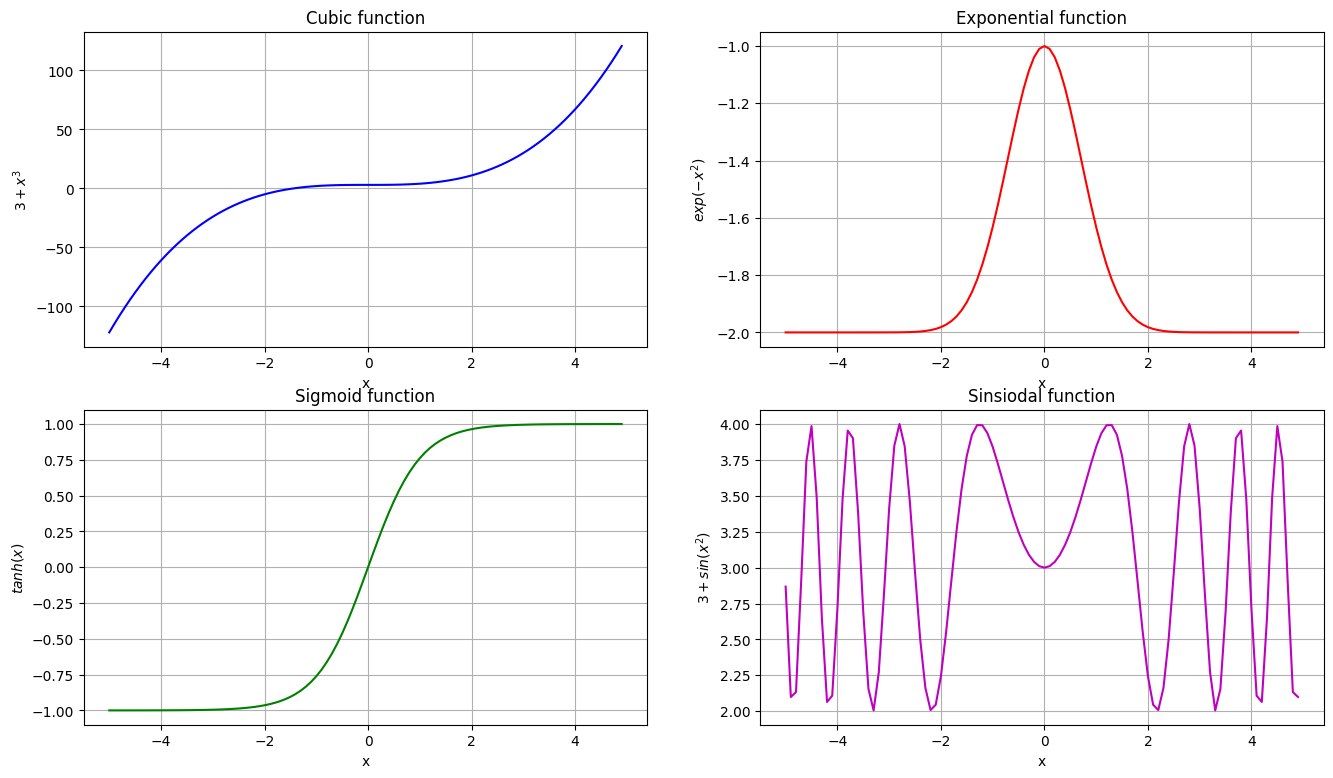

In [71]:
x = torch.arange(-5, 5 , 0.1)
fig = plt.figure(figsize=(16,9))

ax = fig.add_subplot(2, 2, 1) # First subplot

ax.plot(x, 3 + torch.pow(x, 3), 'b-')
ax.set_ylabel("$3 + x^3$")
ax.set_xlabel('x')
ax.set_title("Cubic function")
ax.grid()

ax = fig.add_subplot(2, 2, 2) # Second subplot
ax.plot(x, -2 + torch.exp(-x**2), 'r-')
ax.set_ylabel("$exp(-x^2)$")
ax.set_xlabel('x')
ax.set_title("Exponential function")
ax.grid()

ax = fig.add_subplot(2, 2, 3) # Third subplot
ax.plot(x, torch.tanh(x), 'g-')
ax.set_ylabel("$ tanh(x)$")
ax.set_xlabel('x')
ax.set_title("Sigmoid function")
ax.grid()

ax = fig.add_subplot(2, 2, 4) # Fourth subplot
ax.plot(x, 3 + torch.sin(x**2), 'm-')
ax.set_ylabel("$3 + sin(x^2)$")
ax.set_xlabel('x')
ax.set_title("Sinsiodal function")
ax.grid()

plt.show()

### Linear algebra operations

Given the above `t1` and `t2` matrices, we can perform matrix multiplication $t_1^T \times t_2$ using the `tf.linalg.matmul` function:

In [72]:
t1.dtype, t2.dtype

(torch.float32, torch.float32)

In [73]:
torch.matmul(t1.T, t2)

tensor([[426.0139, 426.0139, 426.0139],
        [293.1672, 293.1672, 293.1672],
        [377.8835, 377.8835, 377.8835]])

or:

In [74]:
t1.T @ t2

tensor([[426.0139, 426.0139, 426.0139],
        [293.1672, 293.1672, 293.1672],
        [377.8835, 377.8835, 377.8835]])

Given the two 1D vectors below:

In [75]:
a = torch.tensor([2,3,4,5])
b = torch.tensor([-1, 4, 2, 1])

we can write the dot product $a . b$ as:

In [76]:
torch.dot(a, b)

tensor(23)

which we can verify by making sure it has the same value as:

In [77]:
torch.sum(a * b)

tensor(23)

### Numerical (statistical) operations: Mean, sum, min, and max
Here is also how to obtain the mean, sum, min, max of a tensor such as:

In [78]:
t1

tensor([[14.3706,  3.5976,  9.5152],
        [10.0047,  7.3342, 11.6616],
        [12.3461,  8.6009, 10.1178],
        [ 7.1976, 10.6908,  7.6625]])

The overall mean, sum, min, and max are:

In [79]:
torch.mean(t1, dtype=torch.float)

tensor(9.4250)

In [80]:
torch.var(t1)

tensor(7.9543)

In [81]:
torch.std(t1)

tensor(2.8203)

In [82]:
torch.sum(t1)

tensor(113.0994)

In [83]:
torch.min(t1)

tensor(3.5976)

In [84]:
torch.max(t1)

tensor(14.3706)

And here are the above quantities for each row:

In [85]:
torch.mean(t1, axis=1)

tensor([ 9.1611,  9.6668, 10.3549,  8.5169])

In [86]:
torch.std(t1, axis=1)

tensor([5.3952, 2.1834, 1.8838, 1.8969])

In [87]:
torch.sum(t1, axis=1)

tensor([27.4834, 29.0004, 31.0648, 25.5508])

In [88]:
torch.min(t1, axis=1)

torch.return_types.min(
values=tensor([3.5976, 7.3342, 8.6009, 7.1976]),
indices=tensor([1, 1, 1, 0]))

In [89]:
torch.max(t1, axis=1)

torch.return_types.max(
values=tensor([14.3706, 11.6616, 12.3461, 10.6908]),
indices=tensor([0, 2, 0, 1]))

## Autograd: Calculating gradients in PyTorch

One significant reason PyTorch is widely used in deep learning is its capability to calculate the gradients (partial derivatives) of any differentiable function composed of one or more tensor operations. This feature facilitates the creation of gradient-based models, as covered in this course. The component of PyTorch responsible for gradient calculation is **[Autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)**.

Here is an  example function: $$ y = f(x) = \cos^3(x) + \sin(x) $$

Let's plot a segment of it:

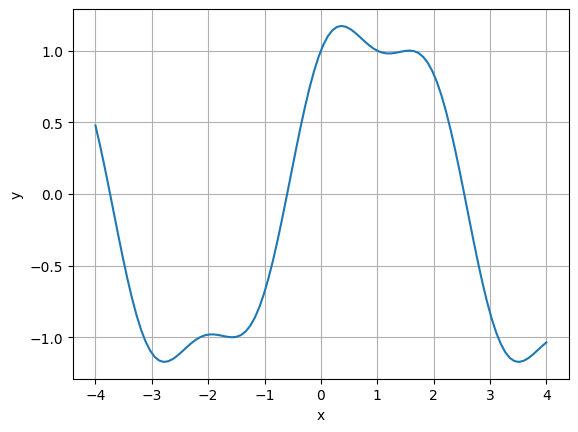

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-4, 4, 100)
y = torch.cos(x)**3 +  np.sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

We [know from calculus](https://www.wolframalpha.com/input?i=cos%28x%29%5E3+%2B+sin%28x%29) that the derivative of this function is:
$$ f^\prime = \frac{d y}{d x} = \cos(x) - 3 \sin(x) \cos^2(x) $$

This process, known as **symbolic differentiation**, is typically performed manually or using symbolic mathematical systems like Mathematica. However, these approaches are impractical for deep learning. Plotting the derivative function yields:

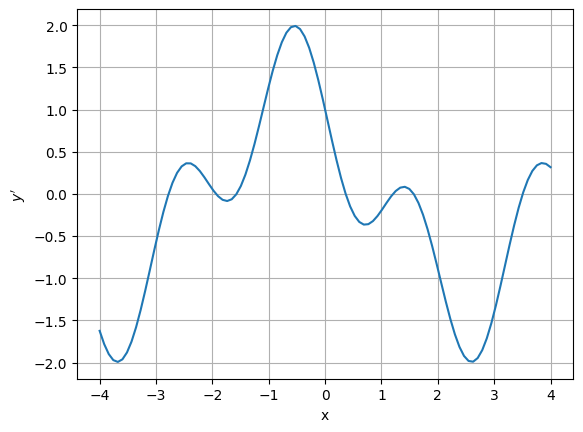

In [91]:
y_prime = torch.cos(x) - 3 * torch.sin(x) * torch.cos(x)**2

plt.plot(x, y_prime)
plt.xlabel('x')
plt.ylabel('$y^\prime$')
plt.grid()
plt.show()

PyTorch's Autograd employs a technique known as **reverse-mode auto-differentiation** to calculate the gradients of a tensor function with respect to its inputs. The computation of these gradients requires a special tensor attribute called `requires_grad`, which is present for every tensor. By default, this attribute is set to **false**. Setting this attribute to true on a tensor instructs Autograd to track all operations performed on this tensor. Since this is a resource-intensive task, the `requires_grad` attribute is only set to true for tensors for which we intend to calculate gradients. In the previous example, we only need to set this attribute to true for the `x` tensor.

In [92]:
x = torch.linspace(-4, 4, 100, requires_grad=True)

Notice that the above cell recreates the `x` tensor with the new `requires_grad` attribute. Alternatively, we could have set the the value of the `requires_grad` attribute of the `x` tensor (or any existing tensor, for that matter) using the `requires_grad_()` method:

In [93]:
x.requires_grad_(False);

Notice the underscore at the end of the method name, `requires_grad_()`, which, following PyTorch conventions, indicates that this is an in-place operation.

To calculate the gradients of `y` with respect to `x` at every value of `x`, we iterate over the values of `x`, and then call the `backward()` method on the output `y` tensor for that value.

In [94]:
grads = torch.empty(len(x))
for i, x_i in enumerate(x):
    x_i.requires_grad_(True)
    y_i = torch.cos(x_i)**3 +  torch.sin(x_i)
    y_i.backward()
    grads[i] = x_i.grad.item()

grads

tensor([-1.6237, -1.7814, -1.8992, -1.9709, -1.9922, -1.9616, -1.8800, -1.7511,
        -1.5808, -1.3770, -1.1493, -0.9082, -0.6647, -0.4297, -0.2131, -0.0236,
         0.1320,  0.2493,  0.3259,  0.3623,  0.3615,  0.3286,  0.2707,  0.1965,
         0.1155,  0.0377, -0.0273, -0.0705, -0.0845, -0.0637, -0.0049,  0.0929,
         0.2281,  0.3966,  0.5919,  0.8059,  1.0289,  1.2502,  1.4591,  1.6449,
         1.7981,  1.9106,  1.9763,  1.9913,  1.9543,  1.8667,  1.7323,  1.5574,
         1.3501,  1.1202,  0.8782,  0.6352,  0.4020,  0.1883,  0.0026, -0.1486,
        -0.2609, -0.3325, -0.3642, -0.3591, -0.3227, -0.2623, -0.1867, -0.1055,
        -0.0288,  0.0339,  0.0739,  0.0839,  0.0586, -0.0050, -0.1076, -0.2471,
        -0.4193, -0.6174, -0.8330, -1.0564, -1.2768, -1.4833, -1.6657, -1.8143,
        -1.9213, -1.9809, -1.9895, -1.9462, -1.8526, -1.7128, -1.5335, -1.3229,
        -1.0909, -0.8482, -0.6058, -0.3745, -0.1638,  0.0180,  0.1645,  0.2719,
         0.3385,  0.3654,  0.3562,  0.31

In the above code, the calculated gradients are stored under the `grad` attribute of the `x_i` tensors. During the computation of these gradients, Autograd created a computational DAG (directed acyclic graph), which can be visualized. To do that, we need to install `torchviz` first.

In [95]:
! pip install torchviz

Having done that, here is the computational graph created by the previous loop.

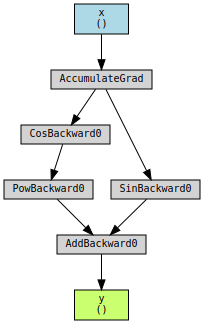

In [96]:
from torchviz import make_dot

make_dot(y_i, dict(x = x_i, y = y_i))

Let's plot the Autograd-calculated gradients next to the original function and its manual gradients.

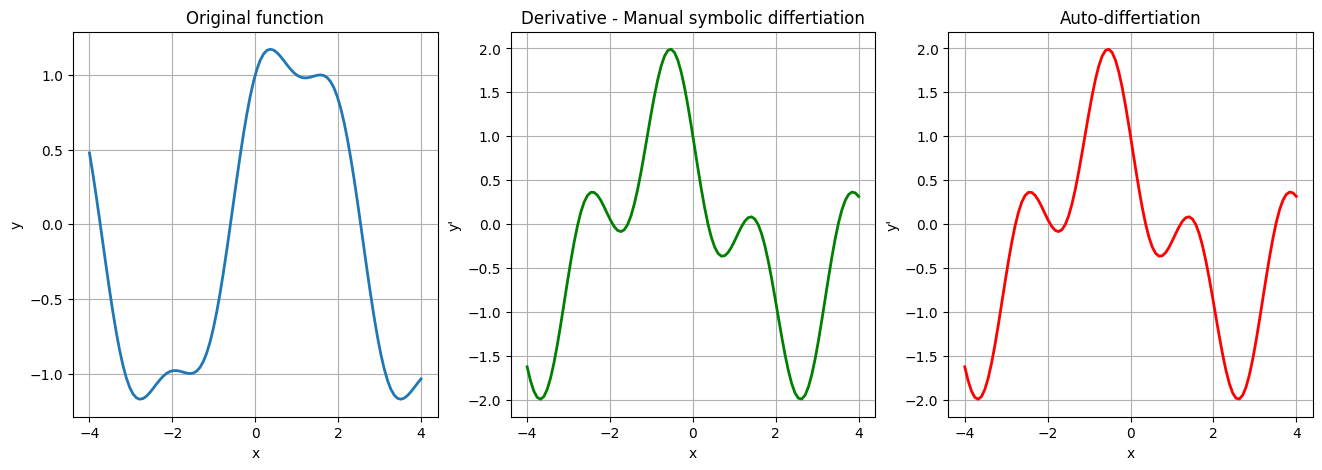

In [97]:
fig = plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(x, y, linewidth=2)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Original function')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(x, y_prime, 'g', linewidth=2)
plt.ylabel('y\'')
plt.xlabel('x')
plt.title('Derivative - Manual symbolic differtiation')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(x, grads, 'r', linewidth=2)
plt.ylabel('y\'')
plt.xlabel('x')
plt.title('Auto-differtiation')
plt.grid()